In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
os.chdir('D:/DeepLearning/Plant Pathology')

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [4]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [20]:
PATH='D:/DeepLearning/Plant Pathology/images'
train_images=[]
def create_train():
    for images in tqdm(train['image_id']):
        img=images+'.jpg'
        final_path=os.path.join(PATH,img)
        train_img=cv2.imread(final_path)
        train_arr=cv2.resize(train_img,(360,360))
        train_images.append(train_arr)
create_train()
print(len(train_images))

100%|██████████████████████████████████████████████████████████████████████████████| 1821/1821 [01:40<00:00, 18.20it/s]

1821


In [21]:
len(train_images)

1821

In [22]:
train_images=np.array(train_images)

In [23]:
train_images.shape

(1821, 360, 360, 3)

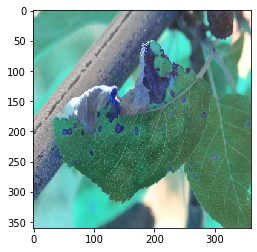

In [24]:
plt.imshow(train_images[1])

In [25]:
train_labels=train.iloc[:,1:5]

In [26]:
train_labels=np.array(train_labels)

In [27]:
train_labels

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [28]:
PATH='D:/DeepLearning/Plant Pathology/images'
test_images=[]
def create_test():
    for img in tqdm(test['image_id']):
        image=img+'.jpg'
        final_path=os.path.join(PATH,image)
        test_img=cv2.imread(final_path)
        test_arr=cv2.resize(test_img,(360,360))
        test_images.append(test_arr)
create_test()
print(len(test_images))


100%|██████████████████████████████████████████████████████████████████████████████| 1821/1821 [01:36<00:00, 18.82it/s]

1821


In [29]:
from numpy import save

In [30]:
save('train_images.npy',train_images)

In [31]:
save('train_labels.npy',train_labels)

In [32]:
save('test_images.npy',test_images)